# Global Street Food Project Goal
The purpose of this project is to predict the target price of global street food dishes using various features such as dish name, country/region, ingredients, category, preparation method, and popularity metrics. By leveraging machine learning, I aim to build a model that can estimate a dish's price based on its characteristics, helping uncover pricing patterns across regions and cuisines.

# Project workflow:
1. Import libraries, load data
2. Exploratory Data Analysis (EDA): understand structure/patterns/outliers etc.
3. Preprocessing: handle NA values, encode categories, scale numerical features
4. Modeling: choose an algorithm and train it on data 
5. Evaluation: measure model performance (RMSE, accuracy, F1 score)
6. Tuning: improve model using hyperparamater tuning or better tuning
7. Deployment/Reporting: use results to drive insights, dashboards, apps
8. Overall Conclusion

# 1. Import Libraries & Load Data

In [22]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 20) # ensures wider tables show more columns
# load data 
df_original = pd.read_csv('/Users/jonighmcgee/Downloads/global_street_food.csv')
# copy to new DF to have a copy of the original import if needed 
df = df.copy()
# preview the copy
df.head(10)

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,3.28,No
1,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,2.37,Yes
2,Funnel Cake,USA,Texas,"Batter, Sugar, Oil","Crispy and hot, often served with sauces or ch...",Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,"Flatbread, Egg, Chicken, Onions, Chutney",Charred to perfection with a smoky flavor.,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,"Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts",Quickly tossed in a hot pan with bold flavors.,Stir-Fried,3.48,Yes
5,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,2.83,Yes
6,Pani Puri,India,Delhi,"Semolina, Tamarind, Chickpeas, Spices",Put together fresh with a mix of flavors and t...,Assembled,0.47,Yes
7,Taiyaki,Japan,Kyoto,"Flour, Red Bean Paste",Golden brown and fluffy with a soft interior.,Baked,2.00,Yes
8,Gözleme,Turkey,Ankara,"Dough, Spinach, Cheese",Charred to perfection with a smoky flavor.,Grilled,4.69,Yes
9,Kokoreç,Turkey,Izmir,"Lamb Intestines, Spices, Bread",Charred to perfection with a smoky flavor.,Grilled,4.26,No


In [11]:
# check basic information and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB


# 2. Exploratory Data Analysis

In [12]:
# check sum of NA values 
df.isna().sum()

Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64

In [15]:
# check value counts for each true Categorical value (not free text/descriptions)
cols_to_check = ['Country', 'Region/City', 'Cooking Method', 'Vegetarian']

for col in cols_to_check:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts().head(10))



Value counts for Country:

Country
Japan           832
Thailand        722
India           682
Mexico          660
Turkey          650
USA             621
Lebanon         118
South Africa     58
Egypt            57
Nigeria          51
Name: count, dtype: int64

Value counts for Region/City:

Region/City
Osaka          287
Tokyo          278
Chiang Mai     246
Ayutthaya      241
Delhi          239
Bangkok        235
Ankara         234
Mumbai         230
Puebla         225
Guadalajara    223
Name: count, dtype: int64

Value counts for Cooking Method:

Cooking Method
Grilled           1852
Fried              718
Baked              549
Stir-Fried         513
Assembled          480
Boiled/Grilled     223
Stewed              58
Boiled              57
Pan-Fried           50
Name: count, dtype: int64

Value counts for Vegetarian:

Vegetarian
Yes    2551
No     1949
Name: count, dtype: int64


The value counts for the Country, Region/City, Cooking Method, and Vegetarian categories reveal key insights:

1. Country Imbalance: Japan leads with 832 dishes, while Nigeria has only 51. This imbalance may affect the model, so it may be helpful to group less-represented countries into an "Other" category during preprocessing.

2. Region/City Distribution: While regions appear more evenly spread, combining them with the Country column could enhance location-based insights and strengthen the model's understanding of geographic patterns.

3. Cooking Method Imbalance: Grilled dominates with 1,852 dishes, compared to only 50 for Pan-Fried. This imbalance suggests that cooking method might be a strong predictor of price, and should be included as a key feature in the model.

4. Vegetarian Balance: The split between vegetarian (2,551) and non-vegetarian (1,949) dishes is fairly even, which means it can be safely used in the model without adjustments for class imbalance.

In [21]:
# check for duplicates
# duplicates can bias the model by over-representing certain rows
# df.duplicated().sum() ##(1288 fully duplicated rows)
#df[df.duplicated()].head(20)
df = df.drop_duplicates() #drop duplicates
df #preview new df without duplicates 

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,3.28,No
1,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,2.37,Yes
2,Funnel Cake,USA,Texas,"Batter, Sugar, Oil","Crispy and hot, often served with sauces or ch...",Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,"Flatbread, Egg, Chicken, Onions, Chutney",Charred to perfection with a smoky flavor.,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,"Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts",Quickly tossed in a hot pan with bold flavors.,Stir-Fried,3.48,Yes
...,...,...,...,...,...,...,...,...
4168,Yakisoba,Japan,Tokyo,"Noodles, Vegetables, Sauce",Stir-fried noodles with vegetables and sauce.,Stir-Fried,4.00,Yes
4170,Taiyaki,Japan,Osaka,"Flour, Red Bean Paste",Fish-shaped cake filled with red bean paste.,Baked,2.00,Yes
4334,Bunny Chow,South Africa,Durban,"Bread, Curry",Hollowed bread filled with curry.,Stewed,3.50,No
4335,Suya,Nigeria,Lagos,"Beef, Spices, Skewers",Spicy meat skewers grilled to perfection.,Grilled,2.50,No


In [24]:
# explore price distribution
df['Typical Price (USD)'].describe()
# the prices are fairly spread, but slightly right-skewed, more expensive dishes increase the mean

count    3212.000000
mean        2.581208
std         1.386575
min         0.200000
25%         1.360000
50%         2.570000
75%         3.780000
max         5.000000
Name: Typical Price (USD), dtype: float64

In [26]:
# check how common a $5.00 dish is
df[df['Typical Price (USD)'] == 5.00]
# only 4 dishes hit the $5.00 mark—these, could be mild outliers worth visualizing in a boxplot.


,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
935,Elote,Mexico,Guadalajara,"Corn, Mayo, Cheese, Chili Powder","Soft and juicy, sometimes charred for flavor.",Boiled/Grilled,5.0,Yes
2024,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,5.0,Yes
2542,Taiyaki,Japan,Kyoto,"Flour, Red Bean Paste",Golden brown and fluffy with a soft interior.,Baked,5.0,Yes
4167,Okonomiyaki,Japan,Hiroshima,"Cabbage, Flour, Pork, Sauce, Mayo",Savory pancake with varied fillings and toppings.,Pan-Fried,5.0,No


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


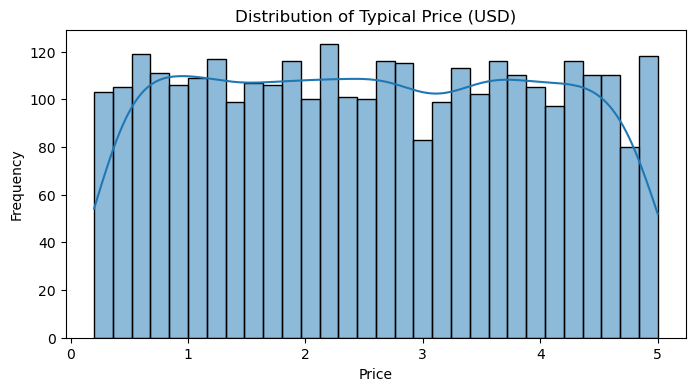

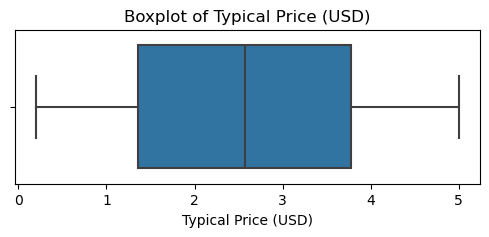

In [27]:
# Visualize price distribution to identify patterns and potential outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE to assess the distribution shape
plt.figure(figsize=(8, 4))
sns.histplot(df['Typical Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Typical Price (USD)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to spot outliers and understand the spread of prices
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Typical Price (USD)'])
plt.title('Boxplot of Typical Price (USD)')
plt.show()


The typical prices of street food dishes range evenly from 0 to 5 dollars (USD), with no significant skew. The histogram shows a relatively uniform distribution, and the boxplot confirms that prices up to 5 dollars are within normal range-meaning dishes priced at 5 dollars are not outliers.

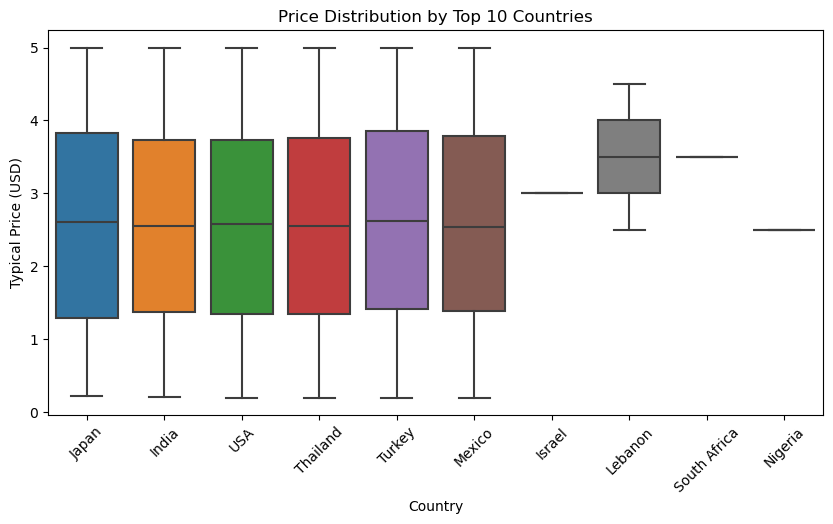

In [28]:
# Compare price distributions across the top 10 countries by dish count
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(x='Country', y='Typical Price (USD)', data=df[df['Country'].isin(top_countries)])
plt.title('Price Distribution by Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

This boxplot reveals distinct pricing patterns among the top 10 countries by dish count. Japan through Mexico display a similar range of prices, with medians around 3 dollars (USD). Israel and Lebanon show more consistent pricing patterns, as indicated by their narrower IQR and shorter whiskers. This suggests that most street food dishes in these countries fall within a tight and predictable price range, with little deviation from the median.

# 3. Preprocessing 
Apply one-hot encoding to convert all categorical features (Country, Region/City, Cooking Method, and Vegetarian) into numeric format. This prepares the data for modeling with linear regression.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# select features to use 
features = ['Country', 'Region/City', 'Cooking Method', 'Vegetarian']
X = df[features] # categorical predictors related to location and preparation
y = df['Typical Price (USD)'] # y is the target variable: the numeric typical price of each dish

# define the encoder for all categorical values 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# 4. Modeling 
Build a machine learning pipeline that applies Linear Regression to the preprocessed data

In [37]:
# Create a pipeline that includes preprocessing and a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets for model training and evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Region/City',
                                                   'Cooking Method',
                                                   'Vegetarian'])])),
                ('regressor', LinearRegression())])

# 5: Evaluation 
Make predictions and evaluate model performance with RMSE

In [38]:
# Predict on test set and calculate RMSE
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1.45


The Root Mean Squared Error (RMSE) measures the average prediction error in dollars. An RMSE of 1.45 means the model's predictions are off by about 1.45 (USD) on average. Given that dish prices range from 0.20 to 5.00 (USD), this is a relatively large error. To improve model accuracy, I will explore model tuning and try more advanced algorithms next.

# 6: Tuning 
Evaluate model performance and improve it by switching to a more flexible algorithm. Linear Regression gave an RMSE of ~1.45, which suggests moderate error. To potentially reduce error and capture more complex relationships, I will now try using a Random Forest Regressor.

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Replace the model with Random Forest in the pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the new model
rf_model.fit(X_train, y_train)

# Predict with Random Forest
rf_y_pred = rf_model.predict(X_test)

# Evaluate performance
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest RMSE: 1.45


Tried Random Forest Regressor to capture non-linear patterns, but RMSE remained ~1.45. This suggests either the data lacks complex structure, or additional features are needed. Next, I will try tuning hyperparameters and/or engineering more informative features.

In [40]:
# The initial Random Forest model used default settings and produced the same RMSE as Linear Regression (~1.45).
# I will now use GridSearchCV to test multiple hyperparameter combinations and see if performance improves.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Create new pipeline with RandomForest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
best_preds = best_model.predict(X_test)
best_rmse = mean_squared_error(y_test, best_preds, squared=False)

print(f"Best RMSE after tuning: {best_rmse:.2f}")
print("Best parameters:", grid_search.best_params_)


Best RMSE after tuning: 1.45
Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


Despite using GridSearchCV to tune hyperparameters of the Random Forest model, the RMSE remained at ~1.45. This suggests that the model is already performing as well as it can given the current features. In other words, the model's predictive power may be limited not by its configuration, but by the information available in the data. To improve performance, I now turn to feature engineering—creating new, potentially more informative features that may reveal deeper relationships with the target price.

In [41]:
# Feature Engineering 

# Combine Country and Region into a single feature
df['Location'] = df['Country'] + ' - ' + df['Region/City']

# Update feature list 
features = ['Location', 'Cooking Method', 'Vegetarian']

#Simplify 'Vegetarian' to binary
df['Vegetarian'] = df['Vegetarian'].map({'Yes': 1, 'No': 0})

# Extract number of ingredients from the 'Ingredients' column
# Count number of ingredients by splitting on commas
df['Num_Ingredients'] = df['Ingredients'].apply(lambda x: len(x.split(',')))

# Update feature list again
features = ['Location', 'Cooking Method', 'Vegetarian', 'Num_Ingredients']

In [42]:
# Update Preprocessing Pipelin
# Since Num_Ingredients is numeric and the rest are categorical, I need to update the ColumnTransformer to handle them appropriately.
from sklearn.preprocessing import StandardScaler

# Separate feature types
categorical_features = ['Location', 'Cooking Method']
numeric_features = ['Num_Ingredients']

# Define updated preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # 'Vegetarian' is already numeric
)


In [43]:
# Rebuild the Model Pipeline with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [44]:
# Train-Test Split and Model Fitting
X = df[features]
y = df['Typical Price (USD)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location',
                                                   'Cooking Method']),
                                                 ('num', StandardScaler(),
                                                  ['Num_Ingredients'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [45]:
# Evaluate Model with RMSE
from sklearn.metrics import mean_squared_error

y_pred = rf_pipeline.predict(X_test)
new_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE after feature engineering: {new_rmse:.2f}")


RMSE after feature engineering: 1.45


Despite introducing engineered features such as a combined Location variable (merging Country and Region/City), simplifying the Vegetarian column to a binary format, and extracting the number of ingredients from the Ingredients column, the RMSE of the Random Forest model remained at approximately 1.45. This outcome suggests that the original categorical features—like Country, Region, and Cooking Method—already contained most of the predictive power available in the dataset. The newly added features may be correlated or redundant, offering little to no additional signal to the model. Another possible explanation is that the target variable, price, may be inherently noisy due to external factors not captured in the dataset (e.g., vendor type, portion size, location demand). As a result, the model's performance may have plateaued, and further improvements will likely require richer, more detailed data, alternative modeling strategies, or domain-specific insights beyond what's currently available.

# Step 7: Deployment/Reporting 
Create visualizations to communicate model insights and pricing patterns across global street food dishes.

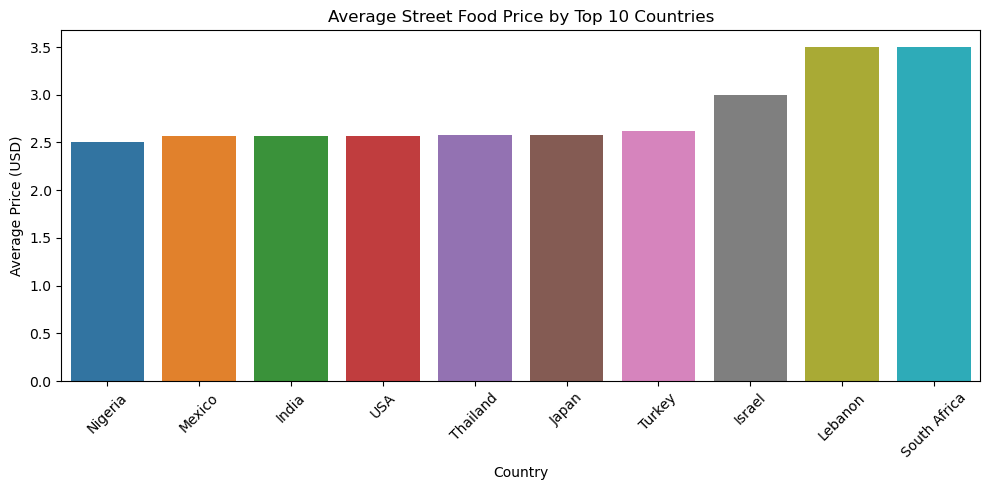

In [46]:
# Average Price by Country (Top 10)
top_10_countries = df['Country'].value_counts().head(10).index
avg_price_by_country = df[df['Country'].isin(top_10_countries)].groupby('Country')['Typical Price (USD)'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values)
plt.title('Average Street Food Price by Top 10 Countries')
plt.ylabel('Average Price (USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar plot shows how average street food prices differ by country. Since "Country" was one of the predictors in the model, understanding its relationship to price helps validate why it was included as a feature. Consistent price differences across countries suggest that geographic location plays a significant role in pricing patterns.

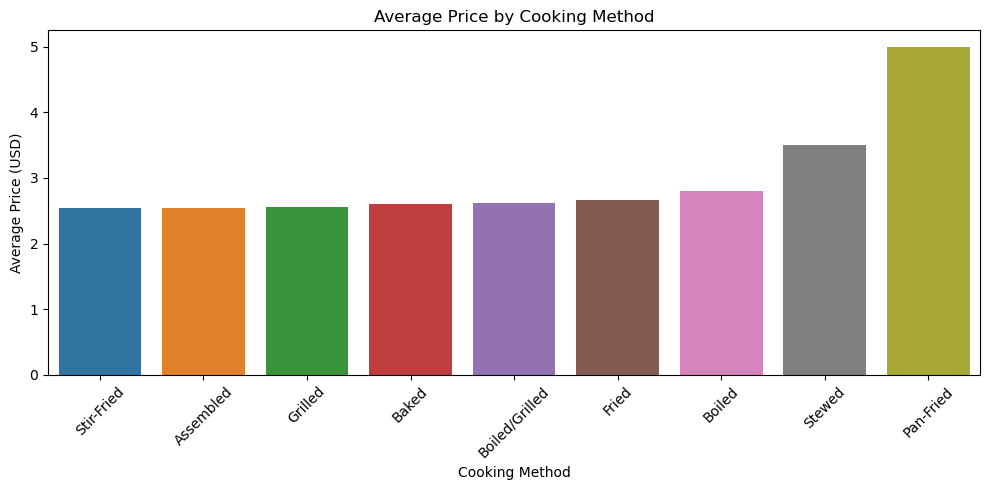

In [47]:
# Average Price by Cooking Method
avg_price_by_method = df.groupby('Cooking Method')['Typical Price (USD)'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_method.index, y=avg_price_by_method.values)
plt.title('Average Price by Cooking Method')
plt.ylabel('Average Price (USD)')
plt.xlabel('Cooking Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart examines how different cooking methods influence the average price (USD) of street food dishes. Most methods, such as stir-fried, grilled, and baked, cluster between 2.50 and 3.00 (USD). However, pan-fried dishes stand out as the most expensive. This price difference may reflect factors like longer preparation time, richer ingredients, or specialized equipment. In contrast, methods like stir-fried and assembled are generally more affordable, likely due to their simplicity and speed of preparation.

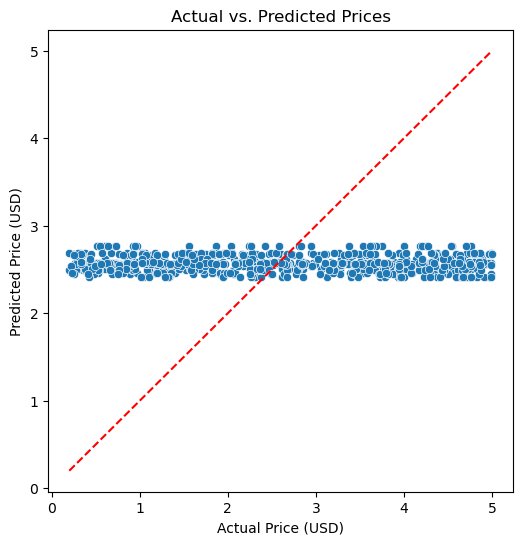

In [48]:
# Scatter Plot of Actual vs. Predicted Prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Actual vs. Predicted Prices')
plt.show()


This scatter plot compares the actual and predicted prices street food prices. Points close to the diagonal line indicate good predictions, while points farther away reveal larger errors. Here, most points cluster horizontally, suggesting the model tends to predict a narrow price range likely close to the average. 

Points far from the diagonal line reveal larger prediction errors, which may suggest underfitting or limited feature impact. This plot is useful for visually assessing model performance, spotting bias, and identifying systematic inaccuracies in predictions. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


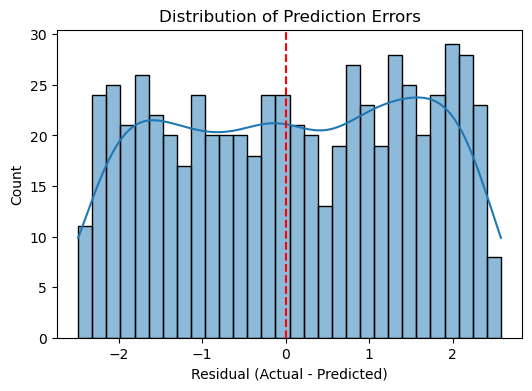

In [49]:
# Residual Plot (Prediction Error)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual (Actual - Predicted)')
plt.title('Distribution of Prediction Errors')
plt.show()


This plot displays the distribution of residuals (prediction errors), helping evaluate how well the model performs. Ideally, residuals should be centered around 0 and form a symmetric, bell-shaped curve, which would suggest that the model has no consistent over or under prediction bias.

In this case, while the residuals are roughly centered around 0, the distribution appears somehwat uneven, which may point to slight underfitting or variability no fully captured by the model. This visualization is a useful diagnostic tool to check prediction fairness and model reliabilty.

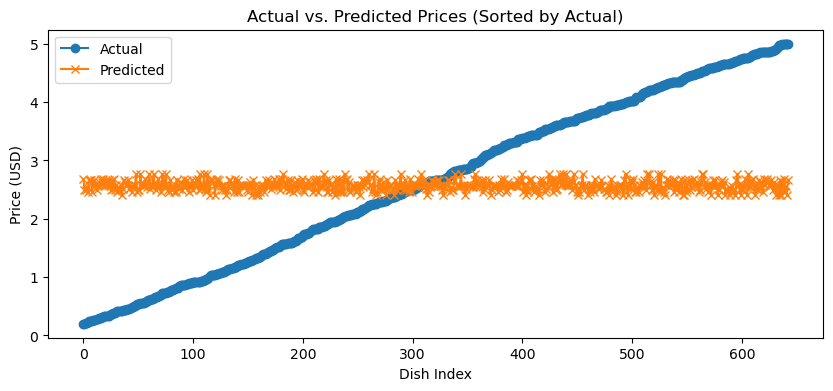

In [50]:
# Predicted vs. Actual Prices with Line Plot
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df = comparison_df.reset_index(drop=True).sort_values('Actual')

plt.figure(figsize=(10, 4))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Prices (Sorted by Actual)')
plt.xlabel('Dish Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


This line plot compares the actual and predicted prices for each dish, sorted by the actual values. It visually highlights where the model under or over predicts. Ideally, the predicted line should closely follow the actual line, indicating strong performance.

In this case, the predicted prices (orange) stay relatively flat while the actual prices (blue) rise steadily. This suggests the model is not capturing price variability well and tends to predict values near the average, pointing to underfitting or limited feature impact. 

# 8: Overall Conclusion
This project aimed to predict the price of global street food dishes using machine learning. After extensive data exploration, preprocessing, and modeling with both Linear Regression and Random Forest, the best model achieved a Root Mean Squared Error (RMSE) of approximately 1.45 USD.

Despite efforts to tune hyperparameters and engineer new features (e.g., combining location, simplifying vegetarian status, and counting ingredients), performance remained the same. This indicates that the original categorical features—such as Country, Region, and Cooking Method—likely contained most of the predictive signal, and that the price variable may be inherently noisy or influenced by unmeasured external factors (e.g., portion size, vendor type, or popularity).

Visualizations confirmed that the model consistently predicts values near the average price, revealing limited variability in predictions and suggesting mild underfitting. Future improvements could come from integrating richer data, such as dish ratings or local economic indicators, or exploring advanced modeling techniques like gradient boosting.

Ultimately, this project provides useful insights into pricing patterns across cuisines and preparation methods, while also highlighting the limits of prediction when data is sparse or lacks key contextual details.